In [1]:
import tensorflow as tf

In [2]:
data_dir = "Dataset"
img_size = 512
batch_size = 32
epochs = 50

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
#Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

In [5]:

class_names = ['no_tumor', 'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor']

train_generator = train_datagen.flow_from_directory(
    'Dataset/Train',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    classes=class_names,
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
   'Dataset/Val',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    classes=class_names,
    shuffle=False
)


Found 4571 images belonging to 4 classes.
Found 262 images belonging to 4 classes.


In [6]:
print("Classes found:", train_generator.class_indices)

Classes found: {'no_tumor': 0, 'glioma_tumor': 1, 'meningioma_tumor': 2, 'pituitary_tumor': 3}


In [ ]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization

# Load MobileNetV2 base model
base_model = MobileNetV2(input_shape=(img_size,img_size, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# Create a directory to save weights if it doesn't exist
os.makedirs("checkpoints_MNV2", exist_ok=True)

# Callback to save weights after each epoch
checkpoint_cb = ModelCheckpoint(
    filepath='checkpoints_MNV2/epoch_{epoch:02d}_valacc_{val_accuracy:.2f}.weights.h5',
    save_weights_only=True,
    save_best_only=False,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)
EarlyStopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1
)

# Train model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[checkpoint_cb, EarlyStopping_cb]
)




C:\Users\vivek\AppData\Local\Temp\ipykernel_22440\346098123.py:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(img_size,img_size, 3), include_top=False, weights='imagenet')
c:\Users\vivek\anaconda3\envs\Tumor_detector\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7139 - loss: 0.7162
Epoch 1: saving model to checkpoints_MNV2/epoch_01_valacc_0.78.weights.h5
143/143 ━━━━━━━━━━━━━━━━━━━━ 764s 5s/step - accuracy: 0.7145 - loss: 0.7149 - val_accuracy: 0.7824 - val_loss: 0.6156
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8663 - loss: 0.3592
Epoch 2: saving model to checkpoints_MNV2/epoch_02_valacc_0.76.weights.h5
143/143 ━━━━━━━━━━━━━━━━━━━━ 783s 5s/step - accuracy: 0.8664 - loss: 0.3590 - val_accuracy: 0.7595 - val_loss: 0.6555
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8690 - loss: 0.3319
Epoch 3: saving model to checkpoints_MNV2/epoch_03_valacc_0.74.weights.h5
143/143 ━━━━━━━━━━━━━━━━━━━━ 766s 5s/step - accuracy: 0.8690 - loss: 0.3317 - val_accuracy: 0.7443 - val_loss: 0.5985
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8916 - loss: 0.2858
Epoch 4: saving model to checkpoints_MNV2/epoch_04_valacc_0.76.weights.h5
143/143 ━━

In [8]:
model.load_weights(r'C:\CDAC\Tumor_Detector_And_Report_Generation\checkpoints_MNV2\epoch_33_valacc_0.89.weights.h5')

In [9]:
model.save("brain_tumor_classifier.keras")

In [13]:
print("Actual class indices from generator:", val_generator.class_indices)

Actual class indices from generator: {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


Found 1311 images belonging to 4 classes.


c:\Users\vivek\anaconda3\envs\Tumor_detector\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 184s 4s/step

Classification Report:

                  precision    recall  f1-score   support

        no_tumor       0.91      0.99      0.95       405
    glioma_tumor       0.98      0.82      0.89       300
meningioma_tumor       0.81      0.83      0.82       306
 pituitary_tumor       0.95      0.97      0.96       300

        accuracy                           0.91      1311
       macro avg       0.91      0.90      0.91      1311
    weighted avg       0.91      0.91      0.91      1311



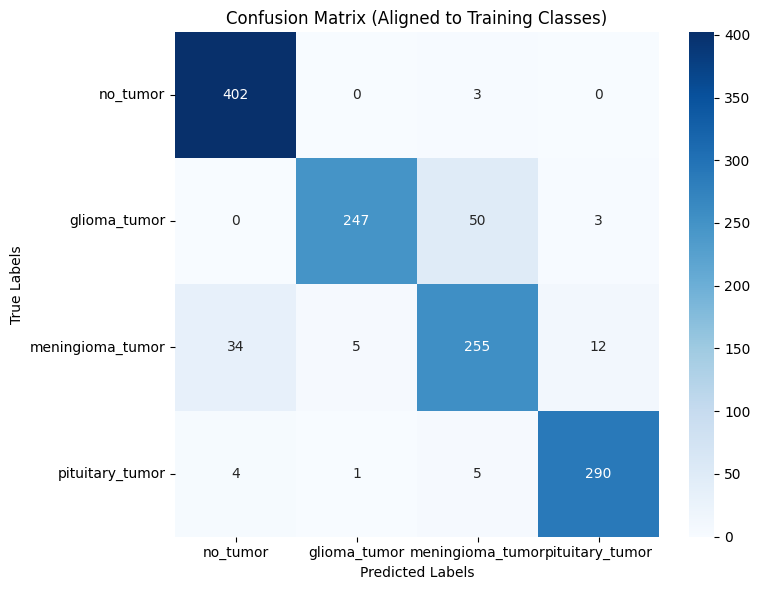

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# === 1. Load the model ===
model = load_model(r'C:\CDAC\Tumor_Detector_And_Report_Generation\brain_tumor_classifier.keras')  # adjust path if needed

# === 2. Define image settings ===
IMG_SIZE = (512, 512)
BATCH_SIZE = 32
val_dir = 'C:\CDAC\Tumor_Detector_And_Report_Generation\Dataset\Val'  # your actual val path

# === 3. Create data generator ===
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=False  # VERY IMPORTANT: don't shuffle for accurate reporting
)

# === 4. Predict on validation data ===
# === Get dynamically sorted class names from class_indices ===
# Actual classes used in training
train_class_indices = {'no_tumor': 0, 'glioma_tumor': 1, 'meningioma_tumor': 2, 'pituitary_tumor': 3}

# Create reverse mapping from index to label based on training
index_to_label = {v: k for k, v in train_class_indices.items()}
train_class_order = [index_to_label[i] for i in range(len(index_to_label))]

# Get predictions
Y_pred = model.predict(val_generator, steps=len(val_generator), verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
y_true_val = val_generator.classes

# Fix y_true to match training indices
# Mapping val class index → class name → training index
val_class_indices = val_generator.class_indices
val_index_to_label = {v: k for k, v in val_class_indices.items()}
y_true_train_indices = [train_class_indices[val_index_to_label[i]] for i in y_true_val]

# Print report
print("\nClassification Report:\n")
print(classification_report(y_true_train_indices, y_pred, target_names=train_class_order))

# Confusion matrix
cm = confusion_matrix(y_true_train_indices, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=train_class_order, yticklabels=train_class_order, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Aligned to Training Classes)')
plt.tight_layout()
plt.show()

